# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[54, 57, 43, ..., 71, 48, 65],
       [27, 90, 19, ..., 75, 54, 19],
       [88, 95,  3, ..., 26, 85, 72],
       ...,
       [ 2, 66, 93, ..., 94, 47, 49],
       [50, 30, 20, ..., 95,  4, 87],
       [51, 31, 53, ..., 35, 48, 96]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
import random
col = list(range(A.shape[1]))
random.shuffle(col)
res=A[:, col]
res

array([[60,  0, 90, ..., 74, 94, 20],
       [62, 84, 19, ..., 74, 83, 68],
       [52, 92, 96, ..., 36, 60, 16],
       ...,
       [67, 63, 51, ..., 35, 53, 54],
       [10, 34, 51, ...,  1,  3, 27],
       [31, 25, 71, ...,  7, 54, 47]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [4]:
sum1 = A[:, ::2].sum(axis=1)
sum2_mean = A[:, 1::2].sum(axis=0).mean()
A[sum1 > sum2_mean, :]

array([], shape=(0, 50), dtype=int32)

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [5]:
np.argmax(np.max(A, axis=1) - np.min(A, axis=1))

8

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [6]:
np.argsort(np.argsort(A.flatten())).reshape(A.shape) + np.ones(A.shape)

array([[5490., 5731., 4429., ..., 7133., 4915., 6547.],
       [2828., 9072., 1938., ..., 7532., 5488., 1972.],
       [8878., 9568.,  350., ..., 2660., 8511., 7222.],
       ...,
       [ 242., 6662., 9369., ..., 9477., 4769., 5032.],
       [5156., 3087., 2063., ..., 9574.,  425., 8726.],
       [5202., 3180., 5420., ..., 3595., 4868., 9650.]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [7]:
min = np.min(A, axis=1)[:, np.newaxis]
max = np.max(A, axis=1)[:, np.newaxis]
(A - min) / (max - min)

array([[0.55670103, 0.58762887, 0.44329897, ..., 0.73195876, 0.49484536,
        0.67010309],
       [0.21111111, 0.91111111, 0.12222222, ..., 0.74444444, 0.51111111,
        0.12222222],
       [0.91666667, 0.98958333, 0.03125   , ..., 0.27083333, 0.88541667,
        0.75      ],
       ...,
       [0.        , 0.66666667, 0.94791667, ..., 0.95833333, 0.46875   ,
        0.48958333],
       [0.51041667, 0.30208333, 0.19791667, ..., 0.97916667, 0.03125   ,
        0.89583333],
       [0.51546392, 0.30927835, 0.53608247, ..., 0.35051546, 0.48453608,
        0.97938144]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [8]:
np.tile(A, (10, 1, 1)) * np.array(range(1, 11))[:, None, None]

array([[[ 54,  57,  43, ...,  71,  48,  65],
        [ 27,  90,  19, ...,  75,  54,  19],
        [ 88,  95,   3, ...,  26,  85,  72],
        ...,
        [  2,  66,  93, ...,  94,  47,  49],
        [ 50,  30,  20, ...,  95,   4,  87],
        [ 51,  31,  53, ...,  35,  48,  96]],

       [[108, 114,  86, ..., 142,  96, 130],
        [ 54, 180,  38, ..., 150, 108,  38],
        [176, 190,   6, ...,  52, 170, 144],
        ...,
        [  4, 132, 186, ..., 188,  94,  98],
        [100,  60,  40, ..., 190,   8, 174],
        [102,  62, 106, ...,  70,  96, 192]],

       [[162, 171, 129, ..., 213, 144, 195],
        [ 81, 270,  57, ..., 225, 162,  57],
        [264, 285,   9, ...,  78, 255, 216],
        ...,
        [  6, 198, 279, ..., 282, 141, 147],
        [150,  90,  60, ..., 285,  12, 261],
        [153,  93, 159, ..., 105, 144, 288]],

       ...,

       [[432, 456, 344, ..., 568, 384, 520],
        [216, 720, 152, ..., 600, 432, 152],
        [704, 760,  24, ..., 208, 680, 576

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [9]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[54, 43, 39, ..., 70, 71, 65],
       [27, 19, 72, ..., 51, 75, 19],
       [88,  3, 86, ..., 23, 26, 72],
       ...,
       [ 2, 93, 33, ..., 79, 94, 49],
       [50, 20, 21, ..., 69, 95, 87],
       [51, 53, 56, ..., 24, 35, 96]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [68]:
len(A[(A > 5).all(1)])

7

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [11]:
new_arr = np.array(np.split(A, 10)).mean(axis=0)
new_arr

array([[51.2, 36.5, 52.2, 32.9, 54.3, 52.1, 45.5, 45.5, 65.4, 47.9, 47.5,
        33.9, 41.3, 53.5, 51.6, 60.7, 50.7, 61.9, 40.5, 49.9, 54.5, 56.9,
        63.3, 54.6, 35.9, 32.1, 50. , 43.1, 64.5, 51.9, 41.3, 37.8, 51.4,
        52. , 33. , 58. , 54.6, 56.7, 51.1, 31.4, 41.9, 32.4, 41.5, 62.4,
        43.9, 34.3, 49.4, 44.1, 41.9, 41.3],
       [40.1, 48.3, 59.5, 41.4, 55.2, 48.1, 47.8, 46.1, 59.5, 41. , 59.1,
        61.3, 56.3, 46.3, 59.4, 55.5, 49.9, 50.7, 49. , 59.4, 68.4, 59.7,
        70.6, 52.8, 48.7, 42.7, 62.8, 43.1, 31.8, 37.7, 36. , 56.3, 30.9,
        43.7, 48.4, 54.1, 49.1, 51.4, 62.2, 49.2, 60.6, 55.5, 44.2, 57.4,
        59.6, 35.6, 49.1, 48.5, 44. , 49.3],
       [34.2, 58.8, 33.6, 54.3, 44.1, 51. , 44.8, 39.9, 46.1, 28.8, 48.1,
        36.3, 44.2, 40.2, 63.8, 41. , 38.3, 47.4, 56.6, 49.8, 48.1, 56.2,
        38.5, 51.8, 28.2, 43. , 52.5, 63.5, 64.7, 60.7, 65.2, 61. , 52.9,
        38.6, 61.8, 34.5, 49.9, 38.9, 50.7, 44.8, 50.7, 55.2, 39.9, 36.5,
        48. , 37.1, 43

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [12]:
A_arr = A.flatten()
values, index = np.unique(A_arr, return_index=True)
A_arr[np.sort(index)]

array([54, 57, 43, 14, 39, 30, 37, 21, 73, 97, 40,  0, 55, 85, 79, 20, 49,
       94, 77, 58, 74, 56, 29, 10, 16, 90, 78, 15, 61, 60, 64, 45, 31, 46,
        1, 24, 70, 71, 48, 65, 27, 19, 72, 75, 22, 83, 84,  8, 59, 68, 81,
       98, 88, 87, 35, 33, 62, 42, 13, 53, 92, 63, 51, 95,  3, 82, 86, 38,
       32, 11, 50, 67, 36, 66, 96, 52, 47, 80, 17, 26, 23, 69, 89, 25,  9,
        2, 18, 28, 93, 12,  4, 34, 76,  6, 41,  5, 91,  7, 99, 44])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [13]:
arr1 = np.tile(A[A.shape[0] // 2], (200,1))
np.linalg.norm(A - arr1, axis=1)

array([264.56190202, 312.11376131, 298.84276802, 298.2700119 ,
       298.59001993, 295.98986469, 298.78252961, 291.24216728,
       300.84879923, 265.27909831, 250.25786701, 291.44639301,
       260.36320785, 287.11495955, 292.88905749, 311.49638842,
       282.48716785, 279.70698954, 276.0851318 , 297.57688082,
       309.59651161, 290.02930886, 306.71485129, 306.96742498,
       294.24479605, 300.11997601, 275.27077578, 306.50611739,
       267.85070468, 313.2443136 , 272.62244955, 316.64806963,
       287.86281455, 242.76737837, 293.96428354, 308.97410895,
       275.89490753, 304.66374907, 284.50834786, 239.19030081,
       304.17593593, 297.4676453 , 278.63955211, 280.26416111,
       264.72438497, 265.64638149, 249.5415797 , 312.01923018,
       330.47995401, 320.43720134, 274.04379212, 260.05576325,
       243.80114848, 271.08116866, 284.24637201, 318.10061301,
       292.28924031, 313.95063306, 294.69136397, 300.39806923,
       292.57990362, 288.96885645, 266.22171211, 263.87

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [14]:
np.where(A < 50, A * 2, A * 3)

array([[162, 171,  86, ..., 213,  96, 195],
       [ 54, 270,  38, ..., 225, 162,  38],
       [264, 285,   6, ...,  52, 255, 216],
       ...,
       [  4, 198, 279, ..., 282,  94,  98],
       [150,  60,  40, ..., 285,   8, 261],
       [153,  62, 159, ...,  70,  96, 288]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте новый массив той же размерности, состоящий из суммы скользящих средних по окну $3$, $5$, $10$.

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [61]:
def window(a, n=5) :
    csum = np.cumsum(a, dtype=float)
    csum[n:] = csum[n:] - csum[:-n]
    return csum[n - 1:] / n

A_arr = A.flatten()
win3 = np.pad(window(A_arr, n=3), (1, 1), constant_values=(0, 0))
win5 = np.pad(window(A_arr, n=5), (2, 2), constant_values=(0, 0))
win10 = np.pad(window(A_arr, n=10), (5, 4), constant_values=(0, 0))
new_arr = win3 + win5 + win10
new_arr

array([ 0.        , 51.33333333, 79.4       , ..., 78.93333333,
       59.66666667,  0.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

Optimization terminated successfully.
         Current function value: -4.882074
         Iterations: 6
         Function evaluations: 16
         Gradient evaluations: 8


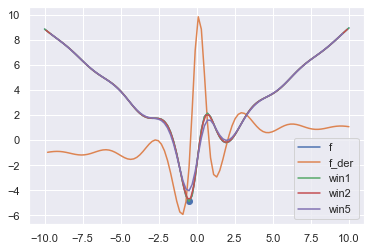

In [62]:
from scipy import optimize
def f(x):
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + abs(x ** 3) - x ** 2) / (x ** 2 + 1)

def window(a, n=5) :
    csum = np.cumsum(a, dtype=float)
    csum[n:] = csum[n:] - csum[:-n]
    return csum[n - 1:] / n

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x), label='f')

# minimun
minimum = optimize.fmin_bfgs(f, 0)
plt.scatter(minimum, f(minimum))

# derivative
plt.plot(x[1:], np.diff(f(x)) / np.diff(x), label='f_der')

plt.plot(window(x, n=1), window(f(x), n=1), label='win1')
plt.plot(window(x, n=2), window(f(x), n=2), label='win2')
plt.plot(window(x, n=5), window(f(x), n=5), label='win5')
plt.legend()
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [51]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
s1 = sample([50, 3, 1, 7, 20], 5_000)

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [50]:
def sample_new(x, c):
    assert len(x) > 0
    
    s = np.sum(x)

    def f11(ranf):
        val = s * ranf
        cusum = np.cumsum(x)
        idx = np.searchsorted(cusum, val)
        return idx

    agr = np.random.random(c)
    g = f11(agr)
    return list(g)

            
s2 = sample([50, 3, 1, 7, 20], 5_000)

In [52]:
from scipy.stats import ttest_ind
# стат. тест Стьюдента

stat, p_value = ttest_ind(s1, s2)
print('stat', stat, 'p_value', p_value)
# p_value > 0.05,  значит, не отвергаем гипотезу об отсутствии различий в выборках

stat 1.0307110444062355 p_value 0.3027012766494193


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [26]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

%timeit walk(10_000)

5.72 ms ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном запусков. 

139 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


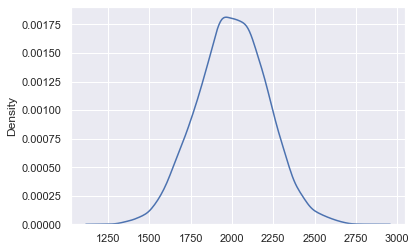

In [27]:
import numpy 

def walk(n: int):
    return np.sum(np.random.choice(np.array([-3, -1, 0, 2, 3]), size=(n, )))

sns.kdeplot([walk(10_000) for _ in range(10_000)])
plt.show()
%timeit walk(10_000)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [16]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))

%timeit strange_conv(a)

11.7 s ± 188 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

Numba

In [17]:
from numba import njit

@njit
def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

a = np.random.random((10000, 10000))

%timeit strange_conv(a)

26.7 ms ± 1.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Taichi

In [18]:
import taichi as ti
ti.init()

@ti.kernel
def strange_conv(a: ti.template()) -> ti.types.float64:
    xx = a.shape[0]
    yy = a.shape[1]

    t = 1.
    for y in range(yy - 5):
        for x in range(xx - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
x = ti.field(float, shape=a.shape)
x.from_numpy(a)

%timeit strange_conv(x)

[Taichi] version 1.3.0, llvm 15.0.1, commit 0f25b95e, win, python 3.7.6
[Taichi] Starting on arch=x64
112 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
